In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#reading test data
df=pd.read_csv('linear_train.csv')
array=df.to_numpy()
X=array[:40000,1:21]

Y=array[:40000,21]

print(X.shape)

(40000, 20)


In [2]:
df.describe()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,0.234036,250.032231,-0.043196,0.000344,-0.138673,22.942050,63.183671,-0.265300,-149.202551,...,-0.307216,0.036604,-2.009511,-1986.100476,0.024010,764.892736,0.099609,63.015279,789.092996,-0.365651
std,14433.901067,285.713891,28.598415,28.596652,0.215329,28.612768,14.382952,28.504422,28.661015,286.684254,...,28.621340,28.642504,570.633593,28.531680,28.693994,28.686856,28.568842,142.545457,28.474483,246.405245
min,0.000000,-1275.133865,139.253653,-114.415607,-0.892349,-132.697679,-36.177565,-46.802955,-137.983886,-1265.689515,...,-114.116214,-127.588682,-2522.962140,-2112.148107,-122.862152,648.803028,-122.725457,-552.138988,668.221949,-967.232274
25%,12499.750000,-193.259466,230.766727,-19.168799,-0.145591,-19.365933,13.194655,44.033199,-19.735327,-341.661814,...,-19.506051,-19.201002,-386.661131,-2005.333057,-19.449297,745.523084,-19.104441,-33.195948,769.894348,-166.951079
50%,24999.500000,0.059497,250.176527,0.025505,-0.000804,-0.024488,22.840589,63.255555,-0.411770,-150.646574,...,-0.347854,0.080235,0.512543,-1985.974373,0.020038,765.043604,0.129850,63.317078,789.112656,-0.021428
75%,37499.250000,193.460359,269.501548,19.359475,0.145529,19.089040,32.641552,82.365940,19.008288,44.603651,...,18.973515,19.385837,383.129776,-1966.843511,19.464868,784.169033,19.366536,159.625909,808.184537,167.628421
max,49999.000000,1186.644980,374.722263,111.582927,0.841337,127.973836,84.284183,177.470797,112.107814,958.061965,...,114.168708,131.896684,2279.968853,-1872.001557,131.750204,875.580472,118.396997,626.430349,903.761618,1069.795054


In [3]:
#Calctulating the value of cost 
def cost_function(x,y,w,b):
    shape=x.shape
    m=shape[0]        #no.of rows(training examples)
    y_predicted=(np.matmul(w,x.T)).T+b
    cost=np.sum((y_predicted-y)**2)/(2*m)
    return cost


In [4]:
#calculating the value of gradient
def gradient_function(x,y,w,b):
    shape=x.shape
    m=shape[0]    #no.of rows(training examples)
    if len(shape)==1:
        n=1   #no.of columns
    else:
        n=shape[1]   #no.of columns
    dJ_b=np.zeros(1)
    dJ_w=np.zeros(n)
    y_predicted=(np.matmul(w,x.T)).T+b
    dJ_w=np.matmul((y_predicted-y),x)
    dJ_b=np.sum(y_predicted-y)

    dJ_w/=m
    dJ_b/=m
    return dJ_w,dJ_b
            

In [5]:
def feature_scaling(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x=(x-mean)/std
    return x,mean,std
X,mean,std=feature_scaling(X)

In [6]:
#applying gradient decent 
def gradient_decent(x,y,w,b,alpha,iterations):
    w_new=w
    b_new=b
    
    for i in range(iterations):
        dJ_w,dJ_b=gradient_function(x,y,w_new,b_new)
        w_new-=(alpha)*(dJ_w)
        b_new-=(alpha)*(dJ_b)
    return w_new,b_new


In [7]:
#change in cost with iterations 
def plottingcost(x,y,w,b,alpha,iterations):
    wnew=w
    bnew=b
    itera_t=iterations
    n=math.floor(iterations/10)
    cost=np.zeros(n)
    m=np.arange(n)
    for i in range(n):
        cost[i]=cost_function(x,y,wnew,bnew)
        wnew,bnew=gradient_decent(x,y,wnew,bnew,.01,10)
    #print(w,b)
    print(cost[n-1])
    plt.plot(m,cost)
    return wnew,bnew

In [13]:
#R2score
def R2score(y_pred,y_act):
    y_act_mean=np.mean(y_act)
    a=np.sum((y_pred-y_act)**2)
    b=np.sum((y_act-y_act_mean)**2)
    R2score_accuracy=1-(a/b)
    return R2score_accuracy

In [8]:
w=np.zeros(20)
b=0

4774.91326376743


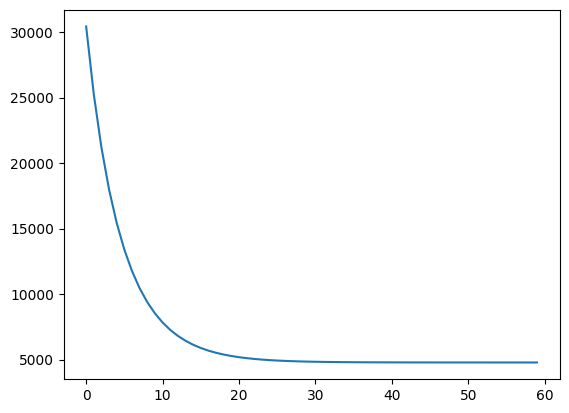

In [9]:
wnew,bnew=plottingcost(X,Y,w,b,.01,600)

In [10]:
X_test=array[40000:,1:21]
X_test=(X_test-mean)/std

Y_test=array[40000:,21]


In [11]:
y_predicted=(np.matmul(wnew,X_test.T)).T+bnew

In [14]:
R2score(y_predicted,Y_test)
#learning rate=0.01
#no of iterations=600

0.8417733612399187

In [15]:
cost_function(X_test,Y_test,wnew,bnew)

4754.205512828334

4774.749203158676


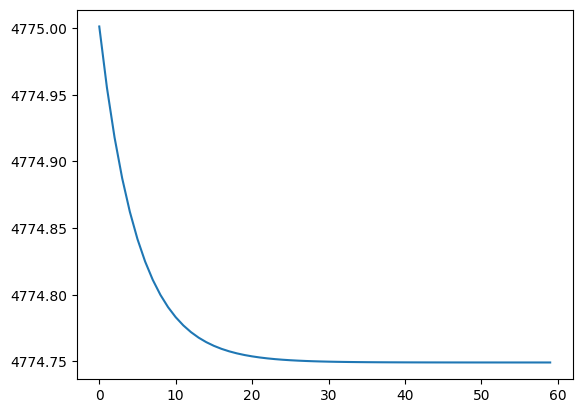

In [16]:
wnew1,bnew1=plottingcost(X,Y,w,b,.001,600)

In [17]:
y_predicted1=(np.matmul(wnew1,X_test.T)).T+bnew1

In [18]:
R2score(y_predicted1,Y_test)

0.8417829152264639

4774.749202123721


0.8417829205312526

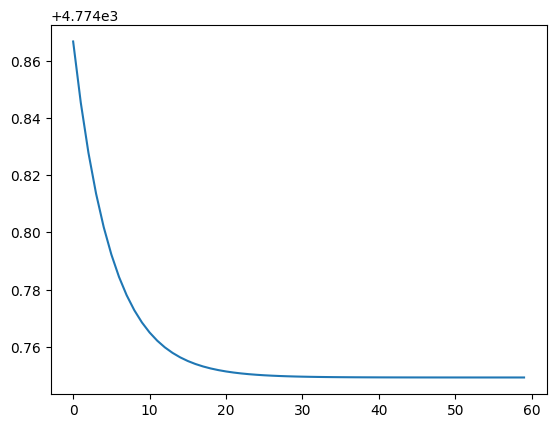

In [19]:
#learning rate=0.001
#no of iterations=600
wnew2,bnew2=plottingcost(X,Y,w,b,.001,600)
y_predicted2=(np.matmul(wnew2,X_test.T)).T+bnew2
R2score(y_predicted2,Y_test)

4774.749201291785


0.8417828704601524

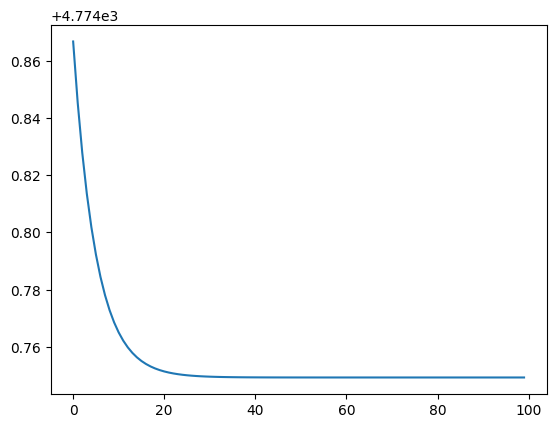

In [20]:
#learning rate=0.001
#no of iterations=1000
wnew3,bnew3=plottingcost(X,Y,w,b,.001,1000)
y_predicted3=(np.matmul(wnew3,X_test.T)).T+bnew3
R2score(y_predicted3,Y_test)

4774.749201291516


0.8417828695505746

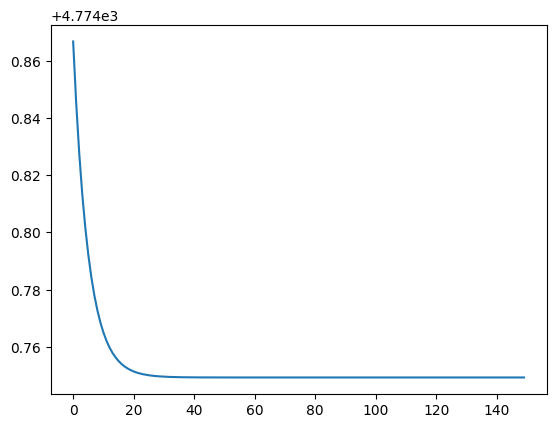

In [21]:
wnew4,bnew4=plottingcost(X,Y,w,b,.001,1500)
y_predicted4=(np.matmul(wnew4,X_test.T)).T+bnew4
R2score(y_predicted4,Y_test)

4774.749202123713


0.8417829205286917

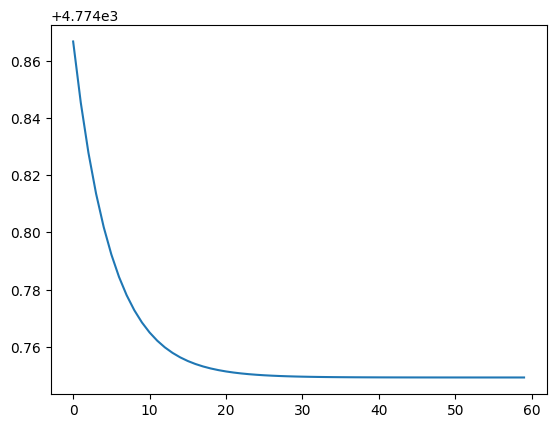

In [22]:
#learning rate=0.001
#no of iterations=600
wnew5,bnew5=plottingcost(X,Y,w,b,.001,600)
y_predicted5=(np.matmul(wnew5,X_test.T)).T+bnew5
R2score(y_predicted5,Y_test)